In [1]:
#| code-fold: true
#| code-summary: Load packages

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

In [2]:
#| echo: false
pd.options.display.notebook_repr_html = False

In [3]:
#| code-summary: Options
#| code-fold: true

# pandas options
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
# pd.options.display.max_rows = 7

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

In [4]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("data/housing.tgz")
    if not tarball_path.is_file():
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="data")
    return pd.read_csv(Path("data/housing/housing.csv"))

housing = load_housing_data()

In [5]:
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/data/main/housing/housing.csv")

In [6]:
housing

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88               41.00       880.00          129.00   
1        -122.22     37.86               21.00      7099.00         1106.00   
2        -122.24     37.85               52.00      1467.00          190.00   
3        -122.25     37.85               52.00      1274.00          235.00   
4        -122.25     37.85               52.00      1627.00          280.00   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48               25.00      1665.00          374.00   
20636    -121.21     39.49               18.00       697.00          150.00   
20637    -121.22     39.43               17.00      2254.00          485.00   
20638    -121.32     39.43               18.00      1860.00          409.00   
20639    -121.24     39.37               16.00      2785.00          616.00   

       population  households  median_income  media

In [7]:
housing = housing.assign(
    median_house_value = lambda x: x["median_house_value"] / 1000,
    bedrooms_ratio = lambda x: x.total_bedrooms / x.total_rooms,
    rooms_per_house = lambda x: x.total_rooms / x.households,
    people_per_house = lambda x: x.population / x.households,
).query(
    'ocean_proximity != "ISLAND" & median_house_value < 500 & housing_median_age < 50 & median_income < 10')

In [8]:
housing.corr()

/var/folders/mp/vcywncl97ml2q4c_5k2r573m0000gn/T/ipykernel_33353/1598269145.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corr()


                    longitude  latitude  housing_median_age  total_rooms  \
longitude                1.00     -0.92               -0.03         0.03   
latitude                -0.92      1.00               -0.06        -0.03   
housing_median_age      -0.03     -0.06                1.00        -0.38   
total_rooms              0.03     -0.03               -0.38         1.00   
total_bedrooms           0.06     -0.06               -0.33         0.94   
population               0.09     -0.11               -0.28         0.86   
households               0.05     -0.07               -0.31         0.92   
median_income           -0.02     -0.07               -0.19         0.23   
median_house_value      -0.03     -0.17                0.02         0.15   
bedrooms_ratio           0.12     -0.14                0.14        -0.19   
rooms_per_house         -0.04      0.13               -0.18         0.14   
people_per_house         0.02     -0.01                0.02        -0.03   

           

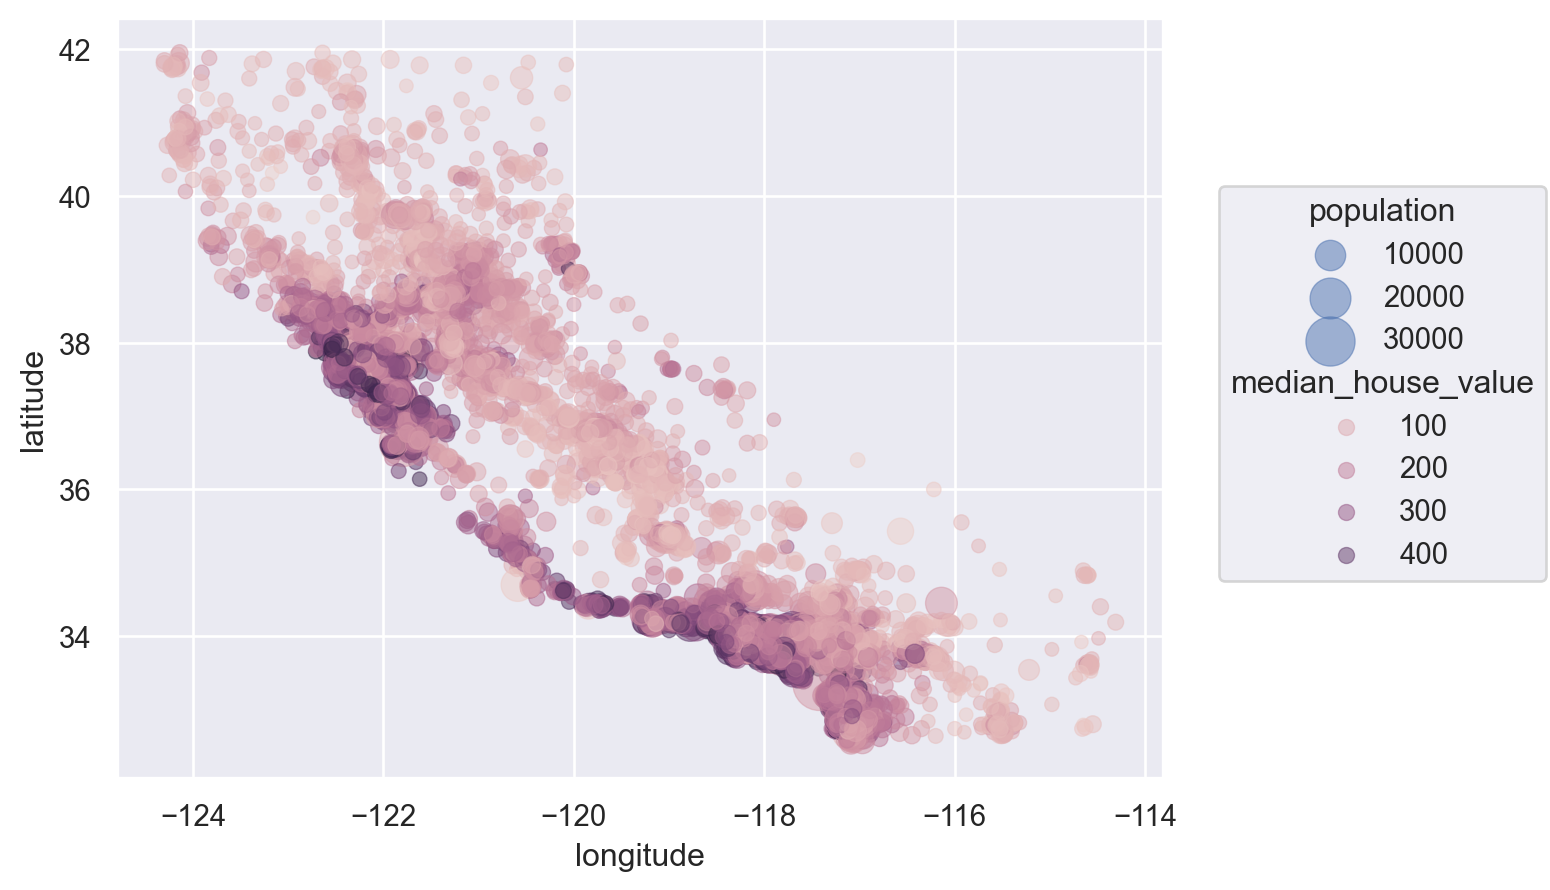

In [9]:
(
    so.Plot(housing, x='longitude', y='latitude', pointsize="population", color="median_house_value")
    .add(so.Dot(alpha=.5))
    .scale(pointsize=(5, 20))
)

In [10]:
cor = housing.corr()
cor["median_house_value"].sort_values()

/var/folders/mp/vcywncl97ml2q4c_5k2r573m0000gn/T/ipykernel_33353/1491143236.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = housing.corr()


bedrooms_ratio       -0.23
latitude             -0.17
people_per_house     -0.03
longitude            -0.03
housing_median_age    0.02
population            0.03
total_bedrooms        0.08
households            0.10
rooms_per_house       0.11
total_rooms           0.15
median_income         0.66
median_house_value    1.00
Name: median_house_value, dtype: float64

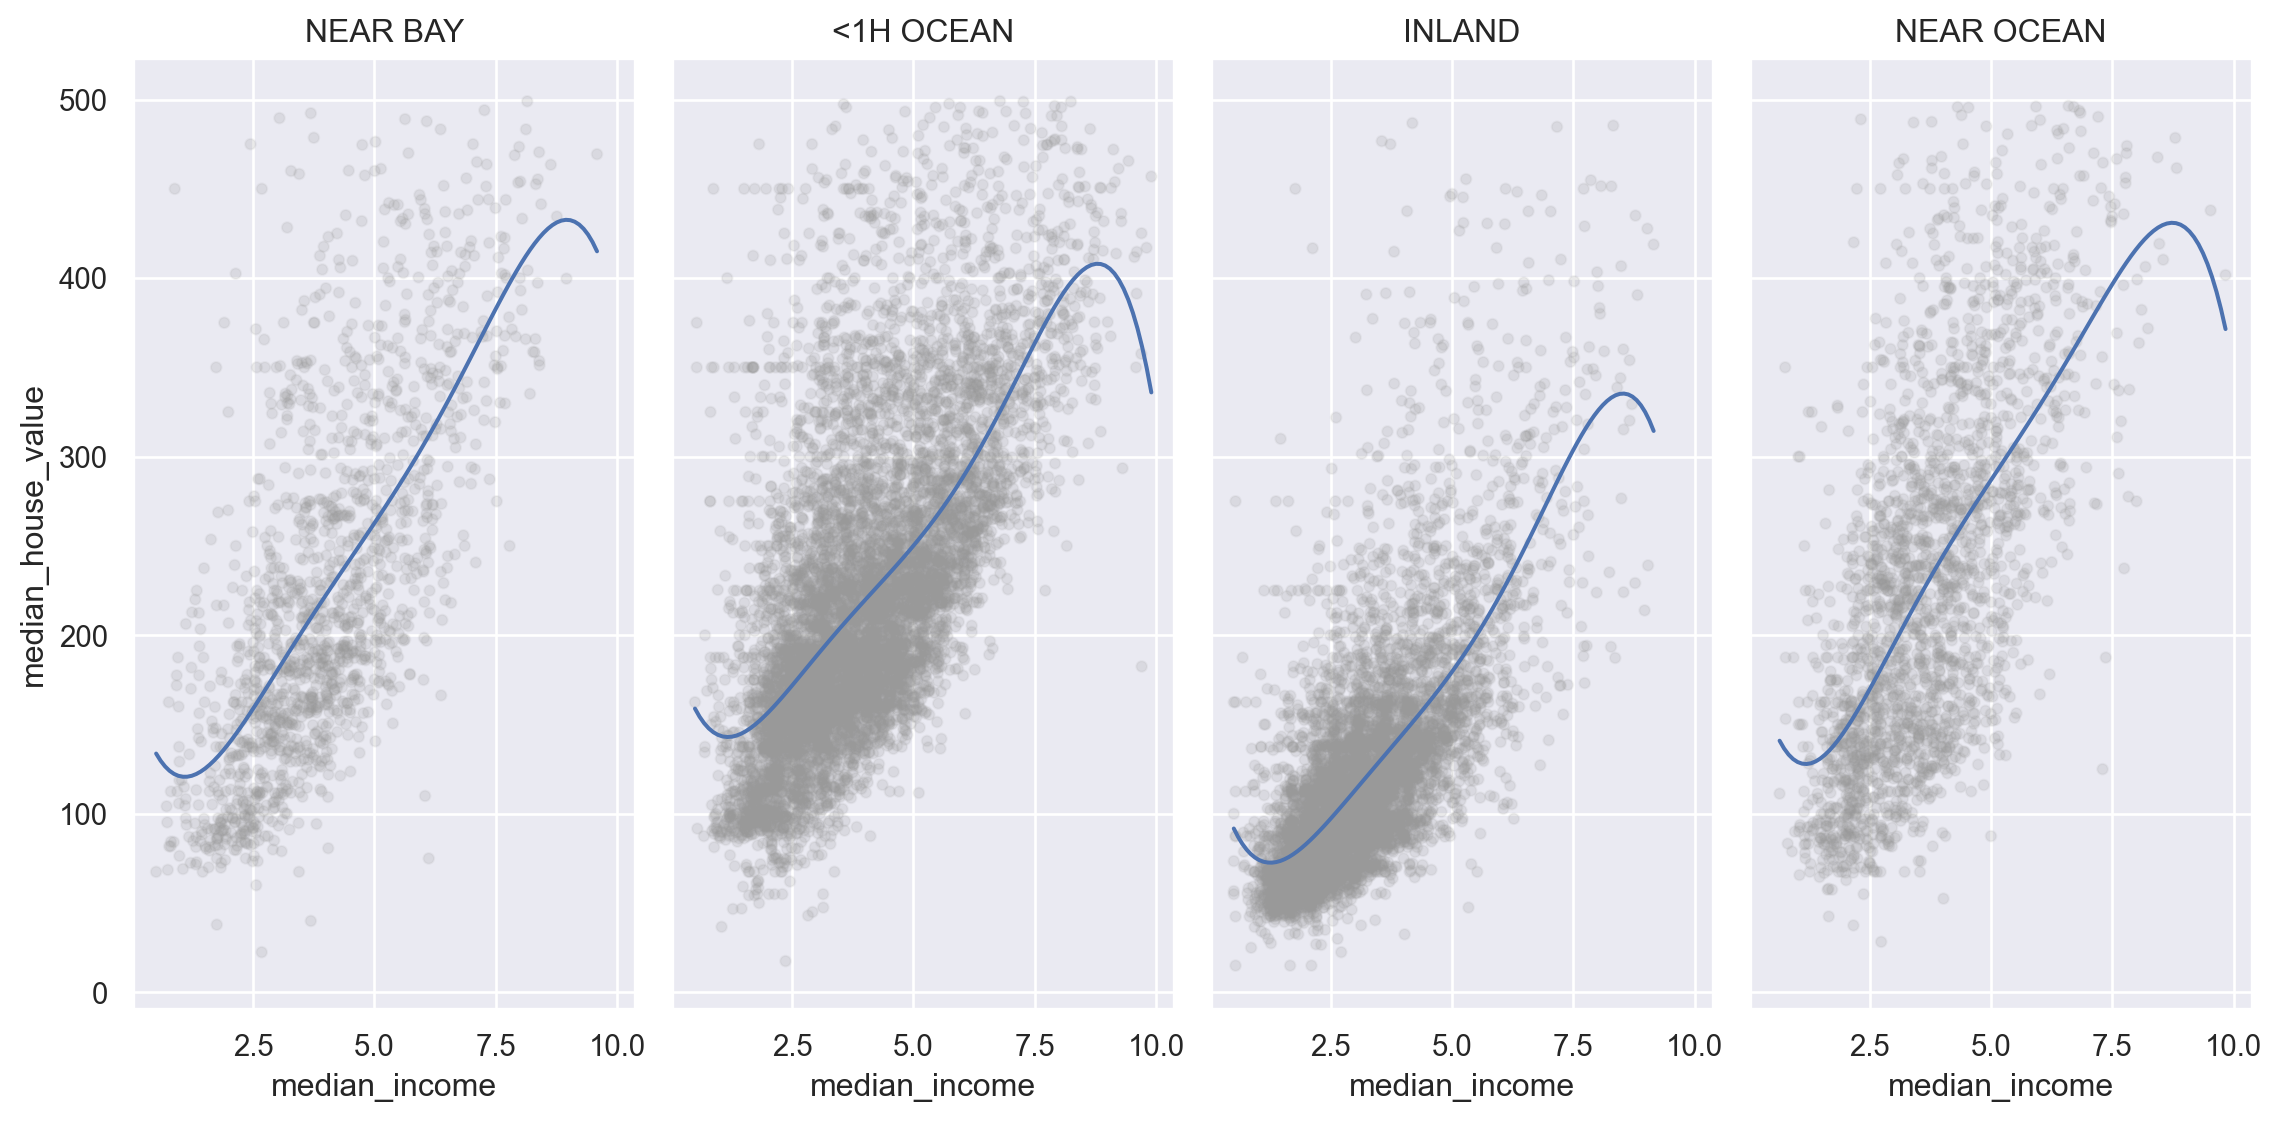

In [11]:
(
    so.Plot(housing, x='median_income', y='median_house_value')
    .add(so.Dots(color=".6", alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .facet("ocean_proximity")
    .layout(size=(12, 6))
)

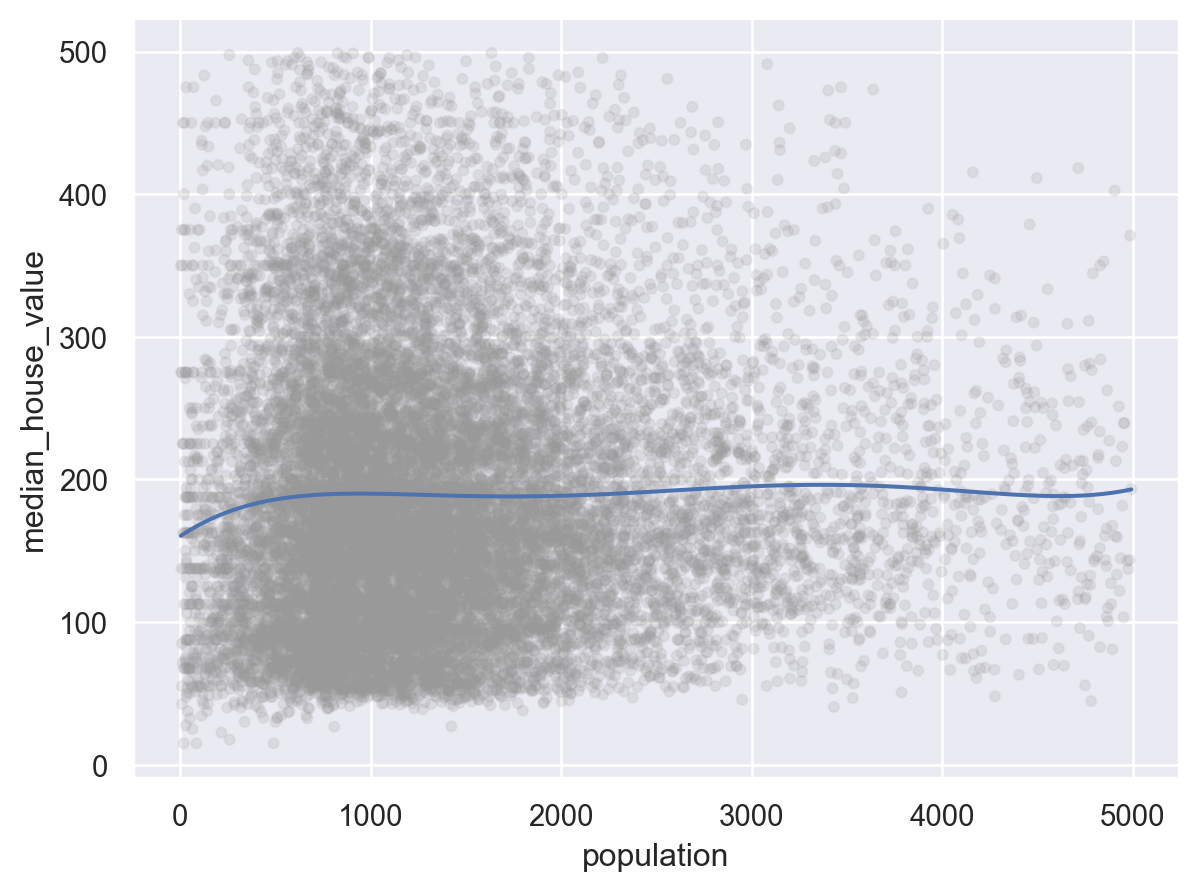

In [70]:
(
    so.Plot(housing.query('population < 5000'), x='population', y='median_house_value')
    .add(so.Dots(color=".6", alpha=.1))
    .add(so.Line(), so.PolyFit(5))
)

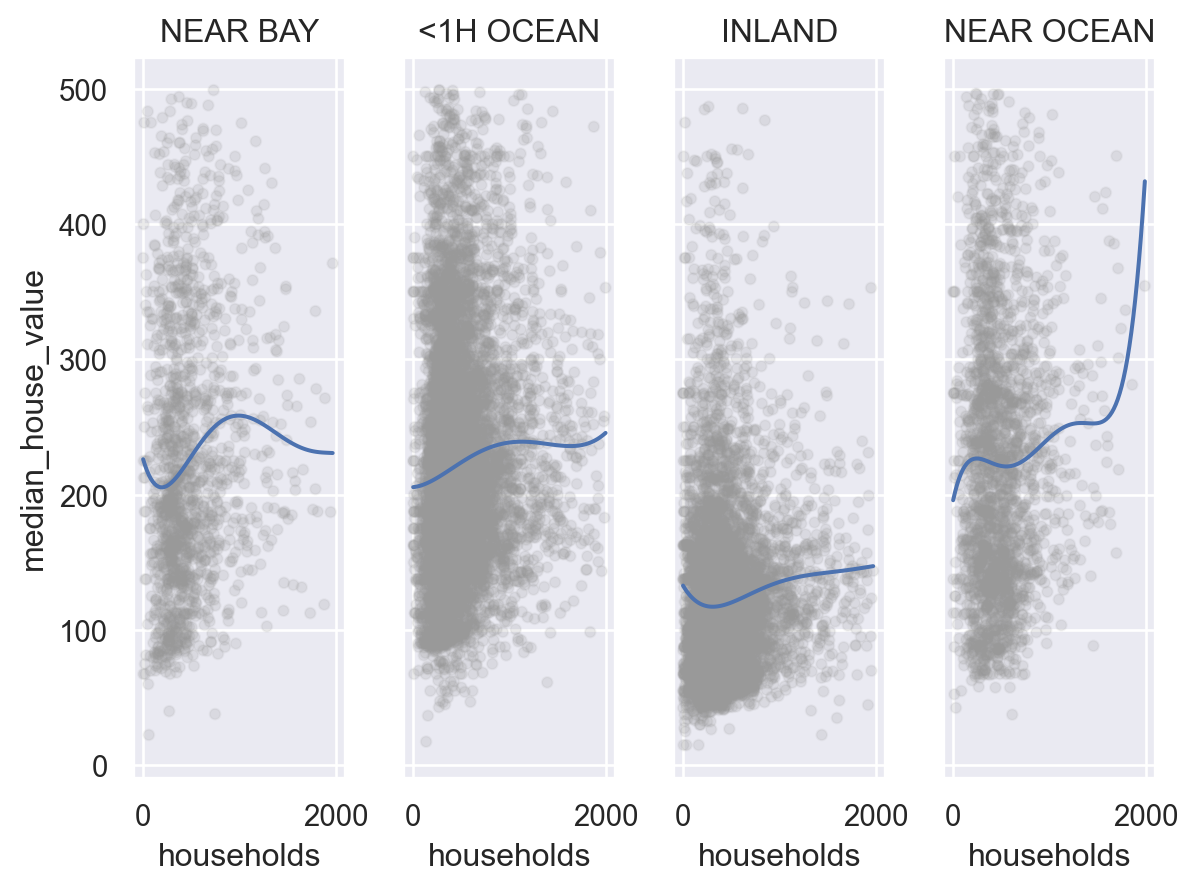

In [71]:
(
    so.Plot(housing.query('households < 2000'), x='households', y='median_house_value')
    .add(so.Dots(color=".6", alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .facet('ocean_proximity')
)

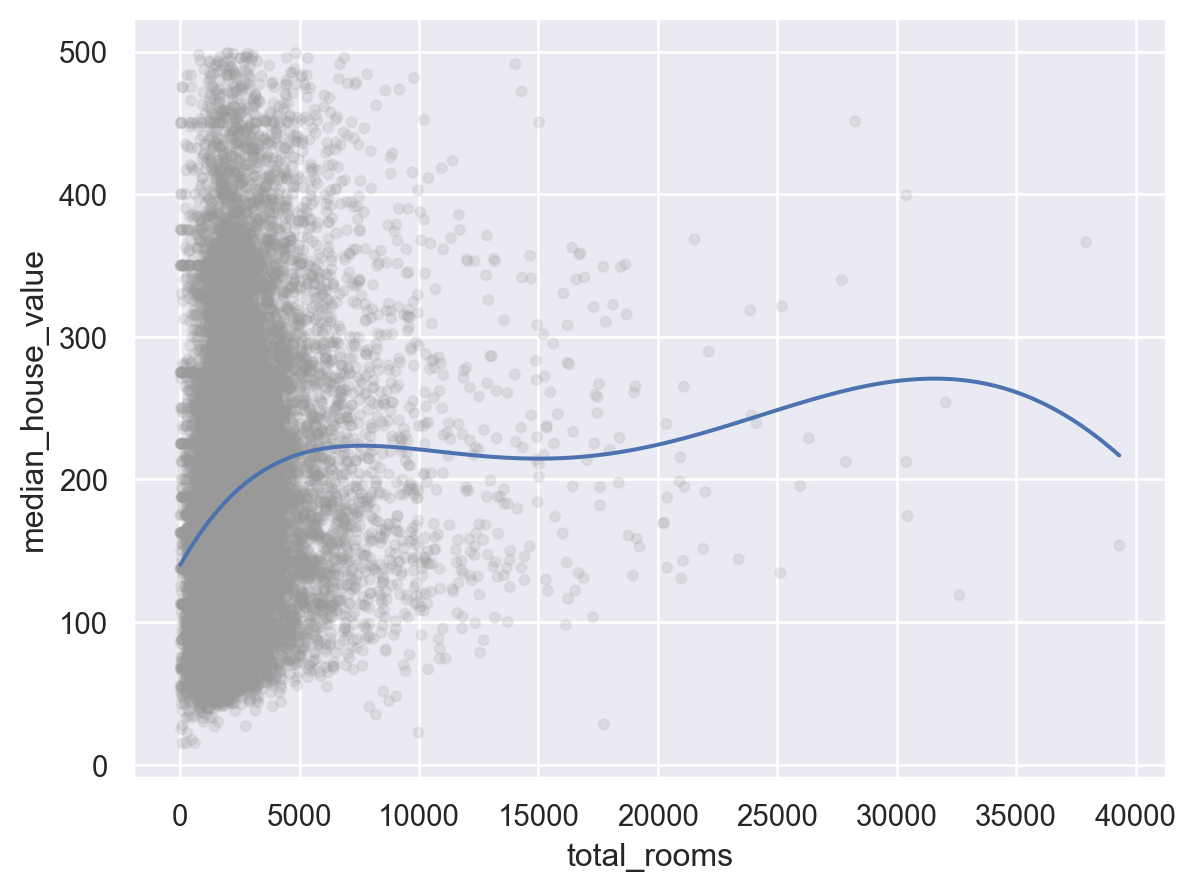

In [51]:
(
    so.Plot(housing, x='total_rooms', y='median_house_value')
    .add(so.Dots(color=".6", alpha=.1))
    .add(so.Line(), so.PolyFit(5))
)

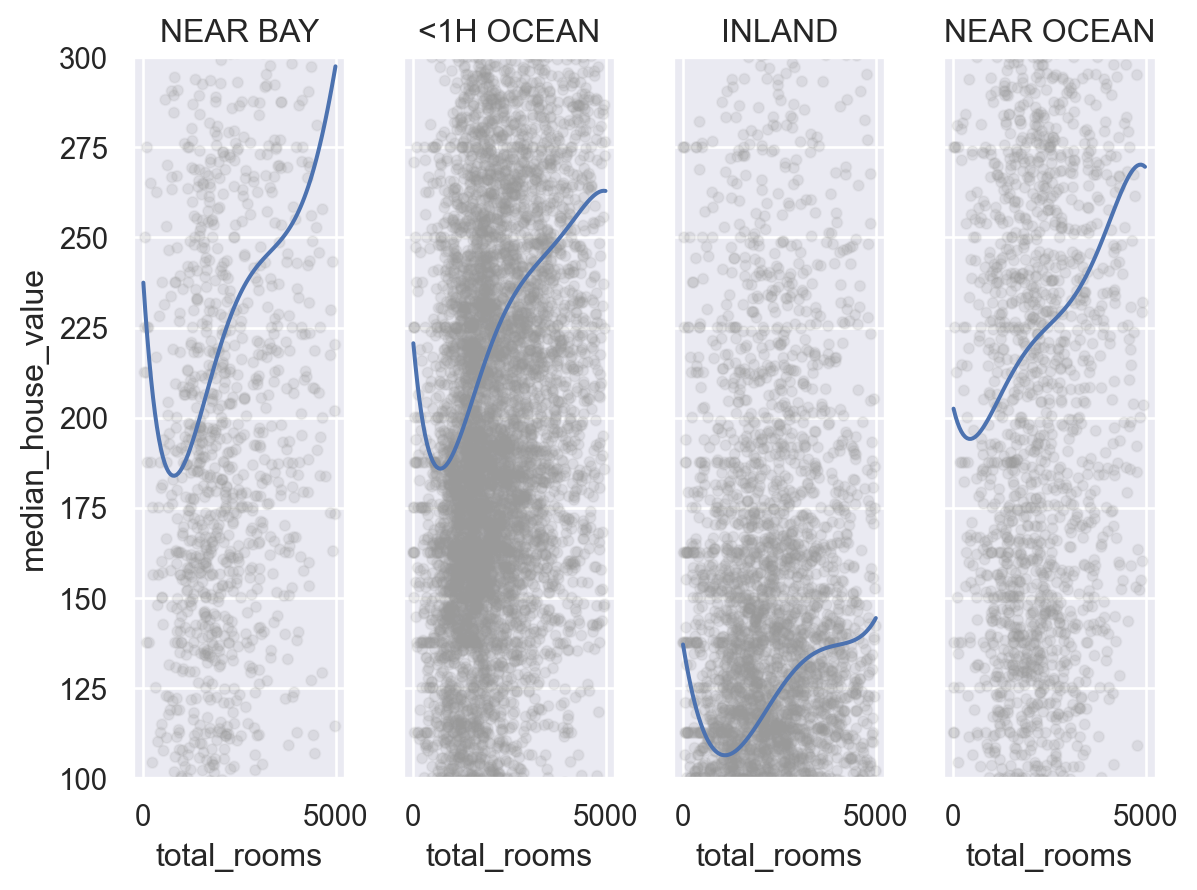

In [60]:
(
    so.Plot(housing.query('total_rooms < 5000'), x='total_rooms', y='median_house_value')
    .add(so.Dots(color=".6", alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .limit(y=(100, 300))
    .facet('ocean_proximity')
)

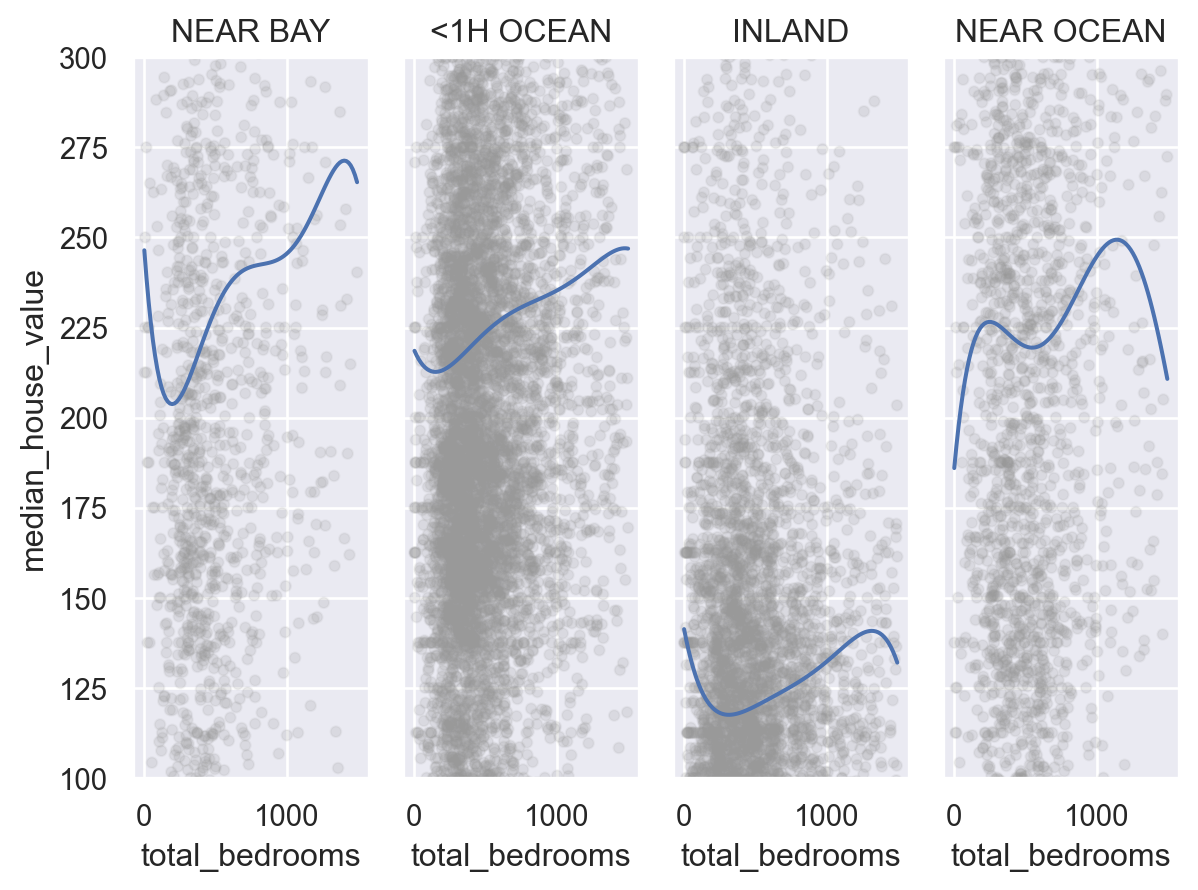

In [59]:
(
    so.Plot(housing.query('total_bedrooms < 1500'), x='total_bedrooms', y='median_house_value')
    .add(so.Dots(color=".6", alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .limit(y=(100, 300))
    .facet('ocean_proximity')
)

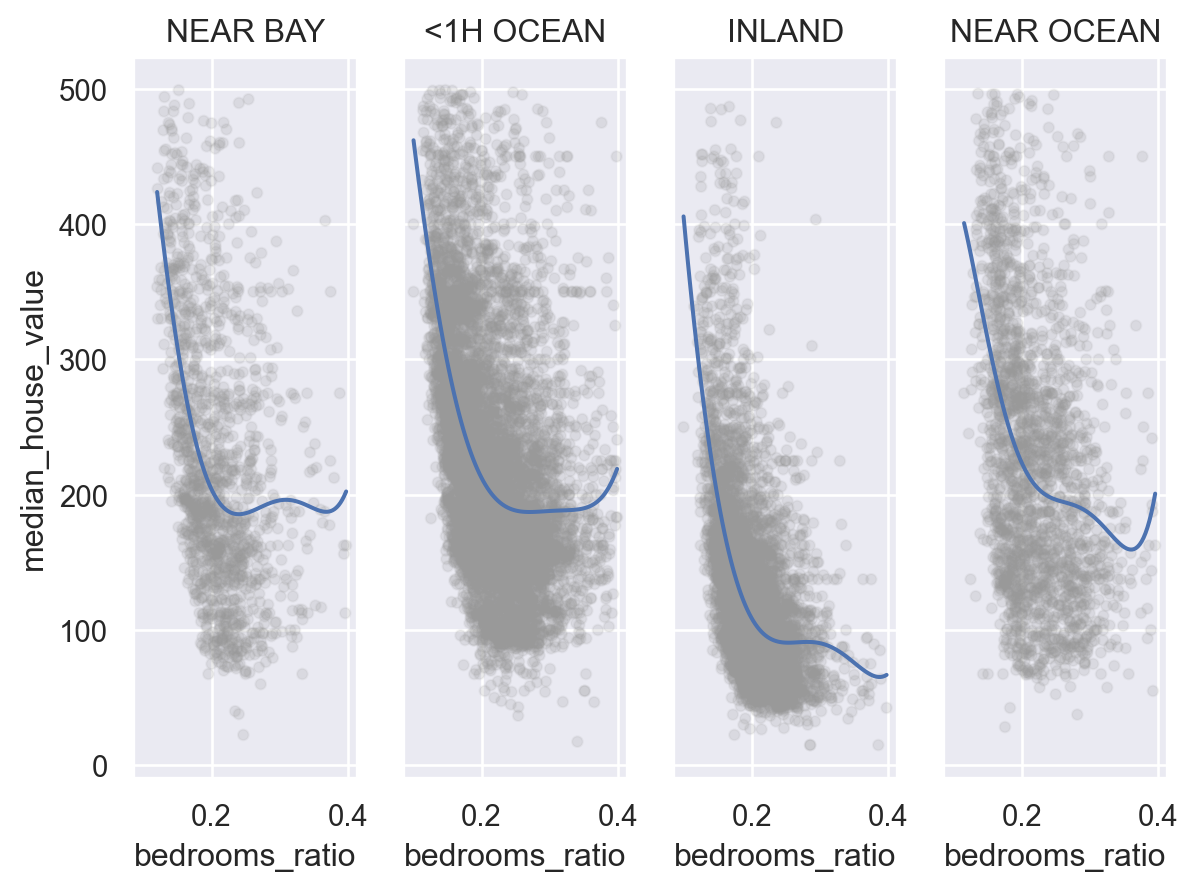

In [58]:
(
    so.Plot(housing.query('bedrooms_ratio < 0.4'), x='bedrooms_ratio', y='median_house_value')
    .add(so.Dots(color=".6", alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .facet('ocean_proximity')
)

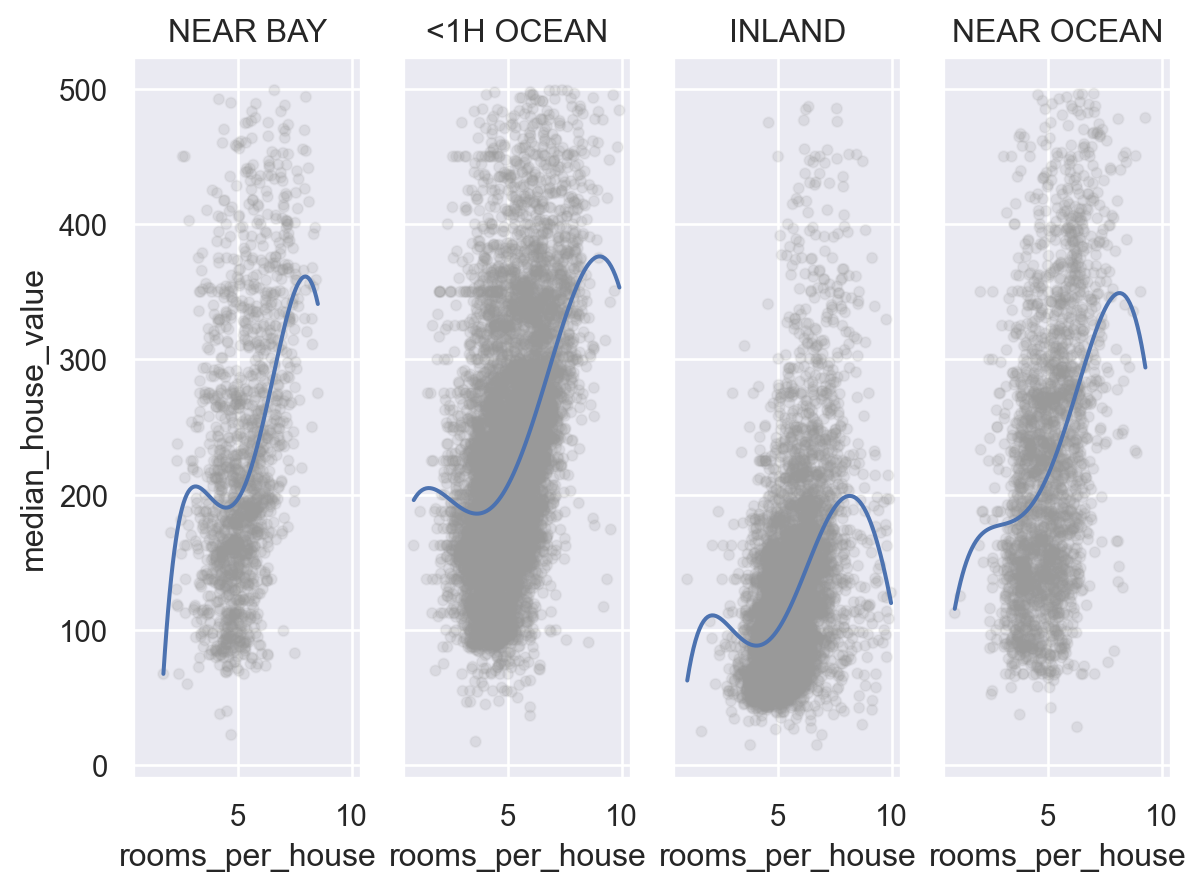

In [57]:
(
    so.Plot(housing.query('rooms_per_house < 10'), x='rooms_per_house', y='median_house_value')
    .add(so.Dots(color=".6", alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .facet("ocean_proximity")
)

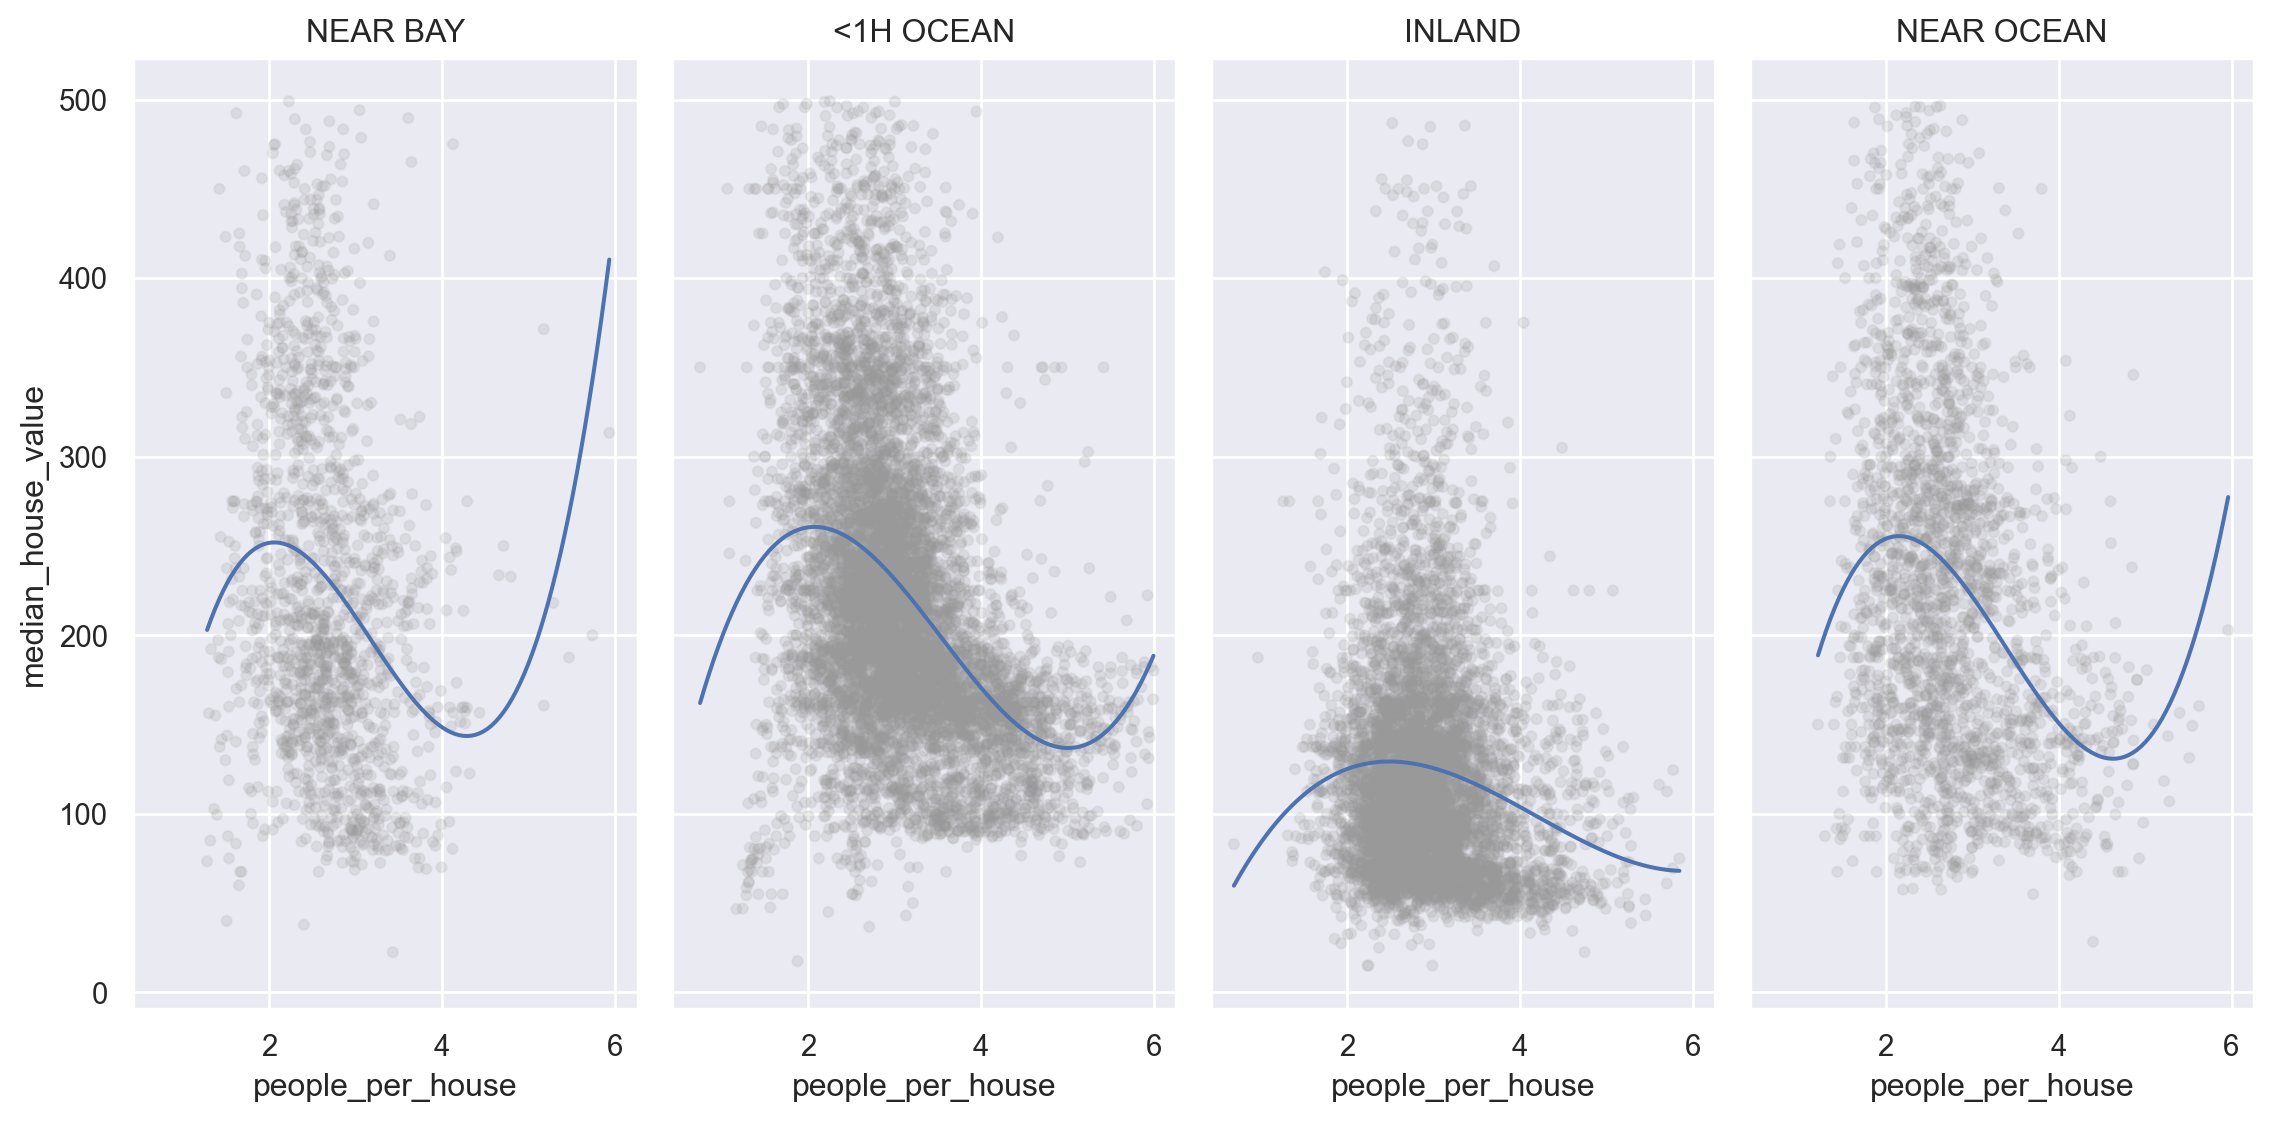

In [76]:
(
    so.Plot(housing.query('people_per_house < 6'), x='people_per_house', y='median_house_value')
    .add(so.Dots(color=".6", alpha=.1))
    .add(so.Line(), so.PolyFit(3))
    .facet("ocean_proximity")
    .layout(size=(12, 6))
)

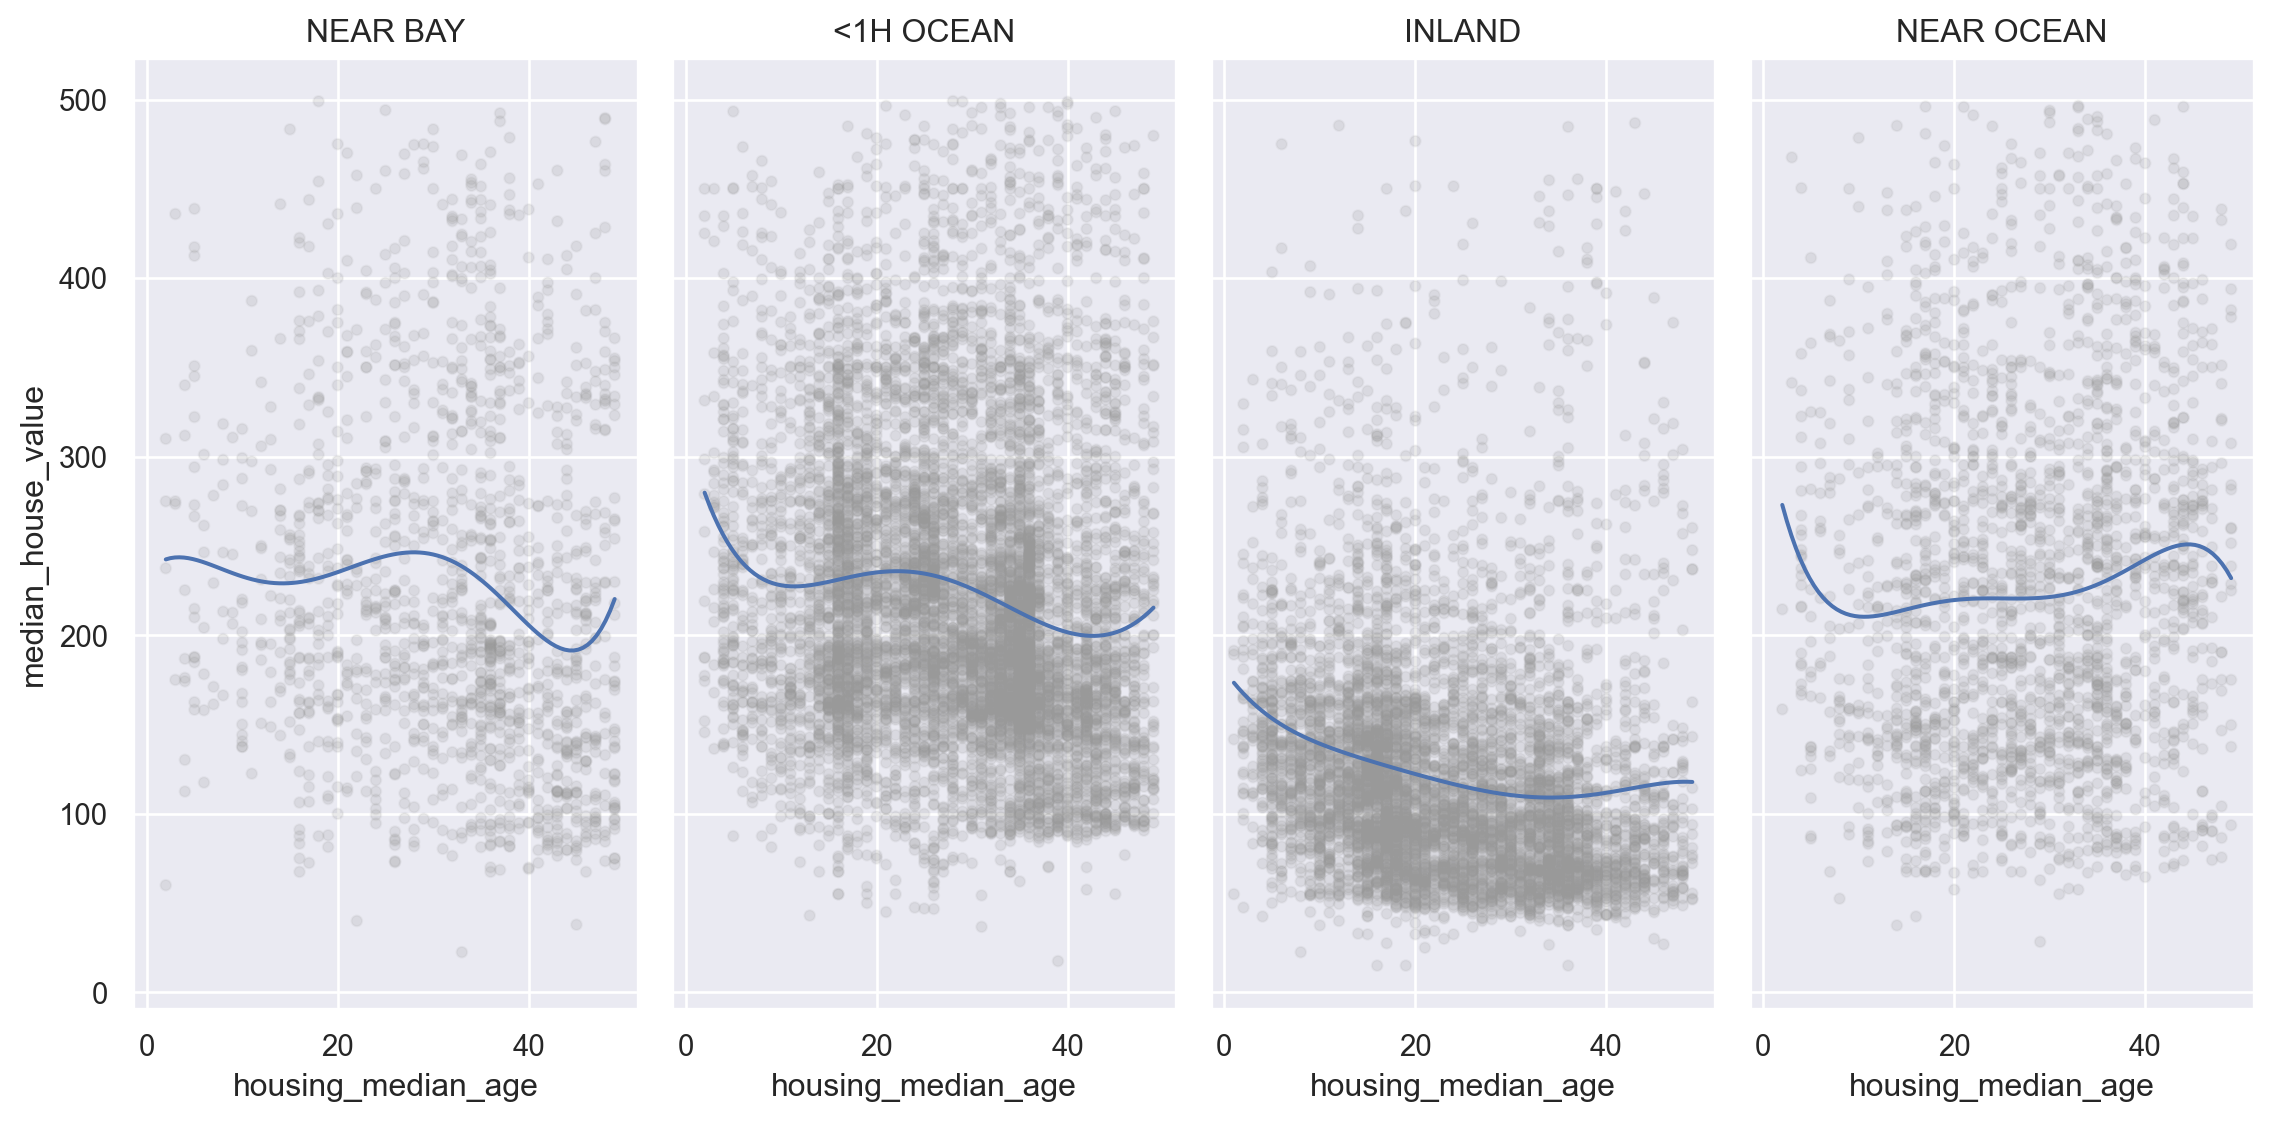

In [73]:
(
    so.Plot(housing, x='housing_median_age', y='median_house_value')
    .add(so.Dots(color=".6", alpha=.1))
    .add(so.Line(), so.PolyFit(5))
    .facet("ocean_proximity")
    .layout(size=(12, 6))
)